In [1]:
#!pip install citipy

In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
from scipy import stats
from scipy.stats import linregress
# Import api key
from config import api_key
# Import citipy for city names by long. and lat.
from citipy import citipy

In [3]:
# Define ranges for longitude and latitude
latitude_range = (-90,90)
longitude_range = (-180,180)

In [4]:
# Create lists for coordinates and cities
lat_long_coord = []
cities = []

# Create random latitude and longitude combinations - 1500 at the end
latitude = np.random.uniform(latitude_range[0], latitude_range[1], size=1500)
longitude = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
lat_long_coord = zip(latitude, longitude)

# Build a for loop to find city names for random coordinates
for lat_long in lat_long_coord:
    city = citipy.nearest_city(lat_long[0], lat_long[1])
    city = city.city_name
    
    # Add the city to a list if it is unique
    if city not in cities:
        cities.append(city)

In [5]:
# Check length of the list
len(cities)
#print(cities)

594

In [6]:
# Create base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}"
# define units
units = "imperial"

# Build query url with units
query_url = f"{base_url}&units={units}&q="

In [7]:
# Create lists for results
temperature = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []
cities_reduced = []
latitude_reduced = []
longitude_reduced = []

In [8]:
# Loop through cities to find results
index = 0

for city in cities:
    
    # Create url for city
    full_url = f"{query_url}{city}"
    index += 1
    
    try:
    # Find json response for city
        response = requests.get(full_url).json()
        city_number = response["id"]
        
        # Find data to append for each city
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        weather_date = response["dt"]
        
        
         # Print text about: Append results
        print(f"City {index} of {len(cities)}: {city} found. City Number: {city_number}. Appending results.")
        
        # Append all results
        cities_reduced.append(city)
        latitude_reduced.append(lat)
        longitude_reduced.append(long)
        temperature.append(temp_max)
        humidity.append(humid)
        cloudiness.append(clouds)
        wind_speed.append(wind)
        countries.append(country)
        dates.append(weather_date)
        
        
    except KeyError:
        print(f"{city} not found.")
        

City 1 of 594: severo-kurilsk found. City Number: 2121385. Appending results.
City 2 of 594: bambous virieux found. City Number: 1106677. Appending results.
City 3 of 594: jamestown found. City Number: 5122534. Appending results.
City 4 of 594: vardo found. City Number: 777019. Appending results.
City 5 of 594: busselton found. City Number: 2075265. Appending results.
City 6 of 594: kandrian found. City Number: 2094746. Appending results.
City 7 of 594: meridian found. City Number: 5600685. Appending results.
attawapiskat not found.
City 9 of 594: safford found. City Number: 5312476. Appending results.
City 10 of 594: quatre cocos found. City Number: 1106643. Appending results.
City 11 of 594: gunnedah found. City Number: 2164206. Appending results.
City 12 of 594: new norfolk found. City Number: 2155415. Appending results.
City 13 of 594: torbay found. City Number: 6167817. Appending results.
City 14 of 594: hermanus found. City Number: 3366880. Appending results.
City 15 of 594: lebu

City 121 of 594: sarmanovo found. City Number: 498537. Appending results.
City 122 of 594: hasaki found. City Number: 2112802. Appending results.
City 123 of 594: san cristobal found. City Number: 3628473. Appending results.
City 124 of 594: namibe found. City Number: 3347019. Appending results.
City 125 of 594: marzuq found. City Number: 72181. Appending results.
City 126 of 594: ilulissat found. City Number: 3423146. Appending results.
City 127 of 594: curup found. City Number: 1645875. Appending results.
City 128 of 594: labuhan found. City Number: 8079926. Appending results.
City 129 of 594: oyek found. City Number: 2018207. Appending results.
City 130 of 594: mayor pablo lagerenza found. City Number: 3867427. Appending results.
City 131 of 594: belmonte found. City Number: 3470137. Appending results.
City 132 of 594: padang found. City Number: 1633419. Appending results.
ngukurr not found.
City 134 of 594: takoradi found. City Number: 2294915. Appending results.
City 135 of 594: e

City 240 of 594: bikin found. City Number: 2026696. Appending results.
City 241 of 594: pacific grove found. City Number: 5380437. Appending results.
City 242 of 594: mount vernon found. City Number: 5127835. Appending results.
City 243 of 594: salamanca found. City Number: 3111107. Appending results.
City 244 of 594: garh maharaja found. City Number: 1178841. Appending results.
City 245 of 594: tessalit found. City Number: 2449893. Appending results.
City 246 of 594: akureyri found. City Number: 2633274. Appending results.
zolotinka not found.
City 248 of 594: lahat found. City Number: 1638775. Appending results.
City 249 of 594: santiago del estero found. City Number: 3835869. Appending results.
City 250 of 594: cidreira found. City Number: 3466165. Appending results.
City 251 of 594: yulara found. City Number: 6355222. Appending results.
City 252 of 594: erenhot found. City Number: 2037485. Appending results.
City 253 of 594: sola found. City Number: 2134814. Appending results.
jabi

City 361 of 594: lagoa found. City Number: 3372964. Appending results.
City 362 of 594: mwinilunga found. City Number: 902620. Appending results.
City 363 of 594: mantua found. City Number: 3174050. Appending results.
City 364 of 594: kununurra found. City Number: 2068110. Appending results.
City 365 of 594: los llanos de aridane found. City Number: 2514651. Appending results.
City 366 of 594: tara found. City Number: 1490140. Appending results.
City 367 of 594: ust-nera found. City Number: 2120048. Appending results.
City 368 of 594: elat found. City Number: 295277. Appending results.
City 369 of 594: muravlenko found. City Number: 1540711. Appending results.
City 370 of 594: zverevo found. City Number: 461910. Appending results.
City 371 of 594: saint george found. City Number: 5546220. Appending results.
City 372 of 594: pasighat found. City Number: 1260206. Appending results.
City 373 of 594: san quintin found. City Number: 3984997. Appending results.
rungata not found.
City 375 of

City 479 of 594: longonjo found. City Number: 3347853. Appending results.
City 480 of 594: sembe found. City Number: 2255304. Appending results.
City 481 of 594: cholet found. City Number: 3025052. Appending results.
City 482 of 594: twentynine palms found. City Number: 5404198. Appending results.
rawannawi not found.
City 484 of 594: aracati found. City Number: 3407378. Appending results.
City 485 of 594: amapa found. City Number: 3407762. Appending results.
tidore not found.
City 487 of 594: oranjestad found. City Number: 3577154. Appending results.
City 488 of 594: zhigansk found. City Number: 2012530. Appending results.
City 489 of 594: murwillumbah found. City Number: 2156049. Appending results.
City 490 of 594: great falls found. City Number: 5655240. Appending results.
City 491 of 594: sao joao da barra found. City Number: 3448903. Appending results.
City 492 of 594: conde found. City Number: 3385077. Appending results.
City 493 of 594: nikolskoye found. City Number: 546105. App

In [9]:
# Create DataFrame from series
weather_data = pd.DataFrame({
    "City": cities_reduced,
    "Latitude": latitude_reduced,
    "Longitude": longitude_reduced,
    "Max Temp.": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})
#weather_data = pd.DataFrame(weather_data)


In [10]:
# Convert Unix timestamp to readable date using datetime module
from datetime import datetime

weather_data["Date Converted"] = pd.to_datetime(weather_data["Date"], unit='s')

dates_converted = weather_data["Date Converted"]

In [11]:
# Display converted time
weather_data

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date,Date Converted
0,severo-kurilsk,50.6789,156.1250,34.48,95,72,5.73,RU,1619117176,2021-04-22 18:46:16
1,bambous virieux,-20.3428,57.7575,79.00,89,75,10.36,MU,1619117177,2021-04-22 18:46:17
2,jamestown,42.0970,-79.2353,37.99,55,90,21.85,US,1619117178,2021-04-22 18:46:18
3,vardo,70.3705,31.1107,33.80,93,75,19.57,NO,1619117178,2021-04-22 18:46:18
4,busselton,-33.6500,115.3333,59.00,77,93,4.00,AU,1619116919,2021-04-22 18:41:59
...,...,...,...,...,...,...,...,...,...,...
535,edirne,41.6772,26.5560,51.89,73,100,6.29,TR,1619117453,2021-04-22 18:50:53
536,thai binh,20.4500,106.3333,78.80,89,20,8.05,VN,1619117453,2021-04-22 18:50:53
537,alamosa,37.4695,-105.8700,53.60,19,40,16.11,US,1619117453,2021-04-22 18:50:53
538,dores do indaia,-19.4633,-45.6017,80.73,37,0,5.41,BR,1619117454,2021-04-22 18:50:54


In [12]:
# Output dataframe to csv
weather_data.to_csv("./OutputData/cities_weather_data.csv", encoding="utf-8", index=False)

In [13]:
# Bring dataframe back in
weather_data_df = pd.read_csv("./OutputData/cities_weather_data.csv")

# Remove Unix Timestamp
weather_data_df = weather_data_df[["City", "Latitude", "Longitude", "Max Temp.", "Humidity", "Cloudiness",
                                  "Wind Speed", "Country", "Date Converted"]]
# Rename column
weather_data_df = weather_data_df.rename(columns = {"Date Converted": "Date"})

weather_data_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,34.48,95,72,5.73,RU,2021-04-22 18:46:16
1,bambous virieux,-20.3428,57.7575,79.00,89,75,10.36,MU,2021-04-22 18:46:17
2,jamestown,42.0970,-79.2353,37.99,55,90,21.85,US,2021-04-22 18:46:18
3,vardo,70.3705,31.1107,33.80,93,75,19.57,NO,2021-04-22 18:46:18
4,busselton,-33.6500,115.3333,59.00,77,93,4.00,AU,2021-04-22 18:41:59
...,...,...,...,...,...,...,...,...,...
535,edirne,41.6772,26.5560,51.89,73,100,6.29,TR,2021-04-22 18:50:53
536,thai binh,20.4500,106.3333,78.80,89,20,8.05,VN,2021-04-22 18:50:53
537,alamosa,37.4695,-105.8700,53.60,19,40,16.11,US,2021-04-22 18:50:53
538,dores do indaia,-19.4633,-45.6017,80.73,37,0,5.41,BR,2021-04-22 18:50:54


In [14]:
# Find max and min of Humidity
weather_data_df["Humidity"].describe()

count    540.000000
mean      65.955556
std       23.813084
min        6.000000
25%       50.000000
50%       71.000000
75%       85.000000
max      100.000000
Name: Humidity, dtype: float64

## Temperature vs. Latitude

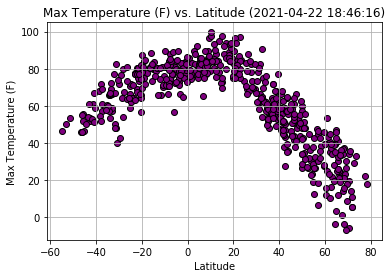

In [15]:
# Create Scatter Plot for Temp vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp."], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Max Temperature (F) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/temp_lat.png")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***max temperature in degrees Fahrenheit*** for that location on a given day. The graph suggests that there is a relationship between these two factors, since they fall along the same line. It shows that as you move from *-60 to 20 degrees latitude*, the temperature increases from 40 to 100 degrees F, and as you move from *20 to 80 degrees latitude*, the temperature decreases from 100 to below 0 degrees F. This suggests that the equator (at *0 degrees latitude*) is where the temperature is the hottest. 

## Humidity vs. Latitude

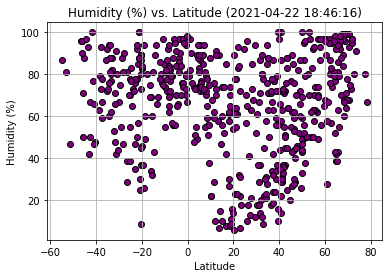

In [16]:
# Create Scatter Plot for Humidity vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Humidity (%) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/humidity_lat.png")
plt.show()

### Analysis: 
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of humidity*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This may show that the **humidity** may be consistently higher in the southern hemisphere (below 0 degrees latitude), and rarely reaching below 20% humidity, in comparison to the northern hemisphere.

## Cloudiness vs. Latitude

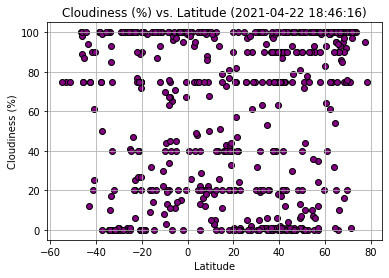

In [17]:
# Create Scatter Plot for Cloudiness vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Cloudiness (%) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/cloudiness_lat.png")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***percentage of cloudiness*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **percentage of cloudiness** cannot be determined by where you are, whether in the southern or northern hemisphere. 

## Wind Speed vs. Latitude

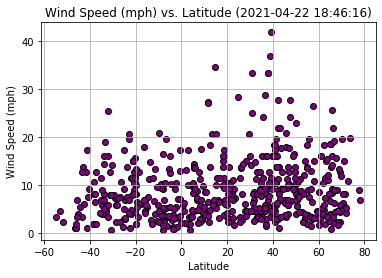

In [18]:
# Create Scatter Plot for Wind Speed vs Lat
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker = "o", color="purple", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed (mph) vs. Latitude ({dates_converted[0]})")
plt.grid()
plt.savefig("./Images/windspeed_lat.png")
plt.show()

### Analysis:
This scatter plot is analyzing the correlation between the ***latitude*** of a city and the ***wind speed in miles per hour*** for that location on a given day. The graph suggests that there may not be a significant relationship between these two factors, since they do not follow a line, and show no apparent pattern. This shows that the **wind speed** cannot be determined by where you are, whether in the southern or northern hemisphere. For the most part, on this given day, the wind speeds were relatively low (most being below 20 mph) across both hemispheres.

In [19]:
# Create separate northern hemisphere dataframe
northern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] >= 0, :]
northern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.6789,156.1250,34.48,95,72,5.73,RU,2021-04-22 18:46:16
2,jamestown,42.0970,-79.2353,37.99,55,90,21.85,US,2021-04-22 18:46:18
3,vardo,70.3705,31.1107,33.80,93,75,19.57,NO,2021-04-22 18:46:18
6,meridian,43.6121,-116.3915,64.00,25,1,6.91,US,2021-04-22 18:46:20
7,safford,32.8340,-109.7076,75.20,9,1,3.44,US,2021-04-22 18:46:20
...,...,...,...,...,...,...,...,...,...
534,ise,34.4833,136.7000,61.00,85,53,8.99,JP,2021-04-22 18:50:52
535,edirne,41.6772,26.5560,51.89,73,100,6.29,TR,2021-04-22 18:50:53
536,thai binh,20.4500,106.3333,78.80,89,20,8.05,VN,2021-04-22 18:50:53
537,alamosa,37.4695,-105.8700,53.60,19,40,16.11,US,2021-04-22 18:50:53


In [20]:
# Create separate southern hemisphere dataframe
southern_hem_df = weather_data_df.loc[weather_data_df["Latitude"] < 0, :]
southern_hem_df

,City,Latitude,Longitude,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
1,bambous virieux,-20.3428,57.7575,79.00,89,75,10.36,MU,2021-04-22 18:46:17
4,busselton,-33.6500,115.3333,59.00,77,93,4.00,AU,2021-04-22 18:41:59
5,kandrian,-6.2167,149.5500,77.13,88,96,3.38,PG,2021-04-22 18:46:19
8,quatre cocos,-20.2078,57.7625,79.00,89,75,10.36,MU,2021-04-22 18:46:21
9,gunnedah,-30.9833,150.2500,39.99,80,0,0.72,AU,2021-04-22 18:46:21
...,...,...,...,...,...,...,...,...,...
529,kalamare,-22.9337,26.5703,63.27,35,100,4.14,BW,2021-04-22 18:50:50
530,pauini,-7.7136,-66.9764,85.15,72,45,2.28,BR,2021-04-22 18:50:50
531,ifakara,-8.1333,36.6833,70.88,94,63,1.59,TZ,2021-04-22 18:50:51
533,nhulunbuy,-12.2333,136.7667,80.60,78,75,11.50,AU,2021-04-22 18:50:52


# Linear Regression:

# Temperature vs. Latitude

## Northern Hemisphere:

In [110]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Max Temp."])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      43.377402
2      52.474662
3      22.503284
6      50.868577
7      62.293922
         ...    
534    60.545579
535    52.919671
536    75.421605
537    57.380052
539    35.828667
Name: Latitude, Length: 361, dtype: float64
y = -1.06x + 97.10


The r-value is: 0.8041792005458831


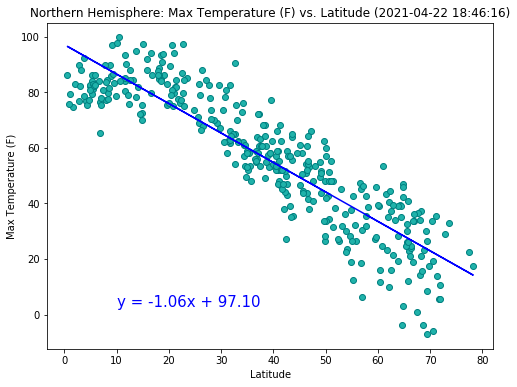

In [111]:
# Create Plot: Temp vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Max Temp."], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Northern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (10,3), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [112]:
# Perform a linear regression on temperature vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Max Temp."])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

1      71.069565
4      62.943069
5      79.696150
8      71.152007
9      64.571580
         ...    
529    69.487343
530    78.782017
531    78.525713
533    76.021908
538    71.606661
Name: Latitude, Length: 179, dtype: float64
y = 0.61x + 83.49


The r-value is: 0.5314608531390194


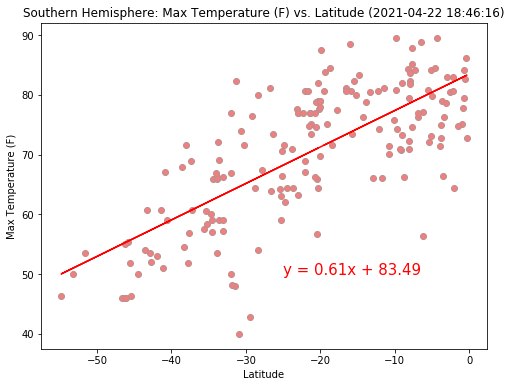

In [113]:
# Create Plot: Temp vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Max Temp."], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Southern Hemisphere: Max Temperature (F) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/temp_lat_south.png")

# Show plot
plt.show()

### Analysis for Temperature vs. Latitude:
#### Using r-values from 4-22-21

There is a greater correlation between *temperature* and *latitude* in the **Northern Hemisphere** cities than the Southern Hemisphere cities, as the r-value is ***0.80*** for the Northern Hemisphere and ***0.53*** for the Southern Hemisphere. This means that in the Northern Hemisphere, as you get farther away from the equator, it will get colder. As well, in the Southern Hemisphere, as you get closer to the equator, it will most likely get warmer, with some exceptions (since the r-value is not as close to 1). 

# Humidity vs. Latitude

## Northern Hemisphere:

In [114]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Humidity"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      65.610149
2      63.322636
3      70.858962
6      63.726487
7      60.853575
         ...    
534    61.293197
535    63.210737
536    57.552608
537    62.089171
539    67.508284
Name: Latitude, Length: 361, dtype: float64
y = 0.27x + 52.10


The r-value is: 0.04515445509110842


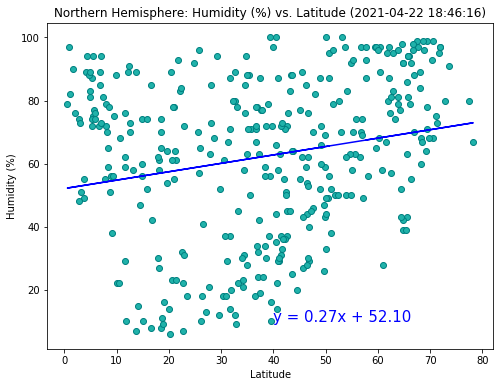

In [115]:
# Create Plot: Humidity vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Humidity"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (40,10), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [116]:
# Perform a linear regression on humidity vs. latitude: Southern
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Humidity"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)


1      73.501407
4      71.830124
5      75.275538
8      73.518362
9      72.165041
         ...    
529    73.176010
530    75.087539
531    75.034828
533    74.519899
538    73.611866
Name: Latitude, Length: 179, dtype: float64
y = 0.13x + 76.06


The r-value is: 0.008589767089648691


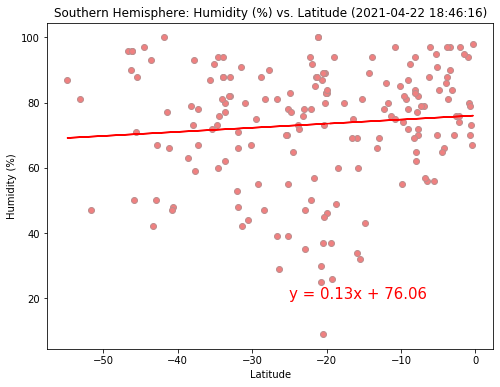

In [117]:
# Create Plot: Humidity vs Lat (Southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Humidity"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: Humidity (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-25,20), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/humidity_lat_south.png")

# Show plot
plt.show()

### Analysis for Humidity vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is hardly any correlation between *humidity* and *latitude*, since both r-values are close to 0. The northern hemisphere's r-value is *0.045*, which is greater than the southern hemisphere's r-value of *0.0085*, but they are still very low.


# Cloudiness vs. Latitude

## Northern Hemisphere:

In [118]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      60.659958
2      57.082469
3      68.868684
6      57.714060
7      53.221054
         ...    
534    53.908589
535    56.907469
536    48.058606
537    55.153429
539    63.628491
Name: Latitude, Length: 361, dtype: float64
y = 0.42x + 39.53


The r-value is: 0.04460682121135793


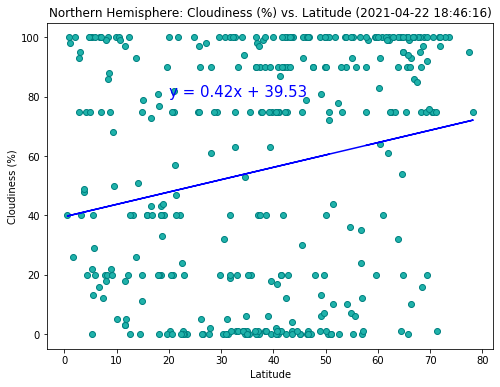

In [119]:
# Create Plot: Cloudiness vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Cloudiness"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (20,80), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [120]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

1      56.449284
4      55.364146
5      57.601198
8      56.460292
9      55.581603
         ...    
529    56.238008
530    57.479133
531    57.444909
533    57.110574
538    56.521002
Name: Latitude, Length: 179, dtype: float64
y = 0.08x + 58.11


The r-value is: 0.0007692166510367917


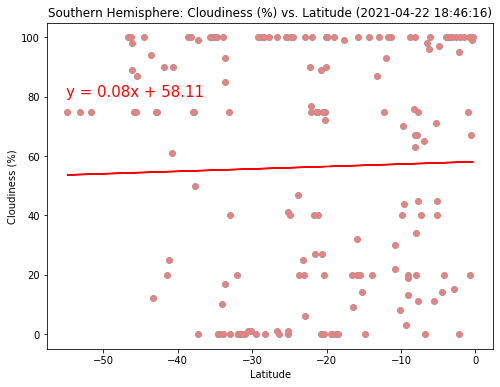

In [121]:
# Create Plot: Cloudiness vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Cloudiness"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere: Cloudiness (%) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-55,80), fontsize=15, color="r")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/cloudiness_lat_south.png")

# Show plot
plt.show()

### Analysis for Cloudiness vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is close to no correlation between *cloudiness* and *latitude*. The Northern Hemisphere r-value of *0.045* suggests that there is no correlation between these two factors in that hemisphere. The r-value of the Southern Hemisphere is *0.0008*, which is even lower. This suggests that the cloudiness is not dependent on which degrees of latitude a city is in.


# Wind Speed vs. Latitude

## Northern Hemisphere:

In [122]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"])

# Get regression values
regress_values = northern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

0      9.746321
2      9.662942
3      9.937638
6      9.677663
7      9.572946
         ...   
534    9.588970
535    9.658864
536    9.452628
537    9.617983
539    9.815507
Name: Latitude, Length: 361, dtype: float64
y = 0.01x + 9.25


The r-value is: 0.0008454614738646871


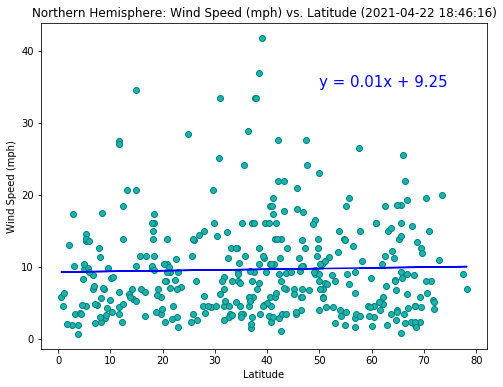

In [123]:
# Create Plot: wind speed vs Lat (Northern)
plt.figure(figsize=(8,6))
plt.scatter(northern_hem_df["Latitude"], northern_hem_df["Wind Speed"], marker = "o", color="lightseagreen", edgecolor="teal")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(northern_hem_df["Latitude"], regress_values,"b-")
plt.annotate(line_eq, (50,35), fontsize=15, color="b")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_north.png")

# Show plot
plt.show()

## Southern Hemisphere:

In [124]:
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"])

# Get regression values
regress_values = southern_hem_df["Latitude"] * slope + intercept
print(regress_values)

# Create line equation string
line_eq = f'y = {slope:1.2f}x + {intercept:1.2f}'
print(line_eq)

1      7.456285
4      7.595257
5      7.308760
8      7.454875
9      7.567408
         ...   
529    7.483342
530    7.324393
531    7.328776
533    7.371594
538    7.447100
Name: Latitude, Length: 179, dtype: float64
y = -0.01x + 7.24


The r-value is: 0.0007971981765435098


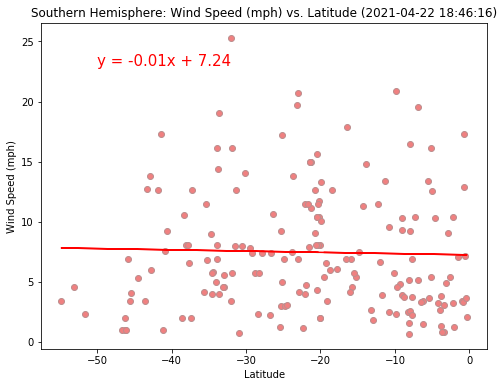

In [125]:
# Create Plot: wind speed vs Lat (southern)
plt.figure(figsize=(8,6))
plt.scatter(southern_hem_df["Latitude"], southern_hem_df["Wind Speed"], marker = "o", color="lightcoral", edgecolor="rosybrown")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere: Wind Speed (mph) vs. Latitude ({dates_converted[0]})")

# Label plot and annotate the line equation
plt.plot(southern_hem_df["Latitude"], regress_values,"r-")
plt.annotate(line_eq, (-50,23), fontsize=15, color="red")

# Print r square value
print(f'The r-value is: {rvalue**2}')

plt.savefig("./Images/windspeed_lat_south.png")

# Show plot
plt.show()

### Analysis for Wind Speed vs. Latitude:
#### Using r-values from (4-22-21)

For both hemispheres, there is also close to no correlation between *wind speed* and *latitude*. Both the Northern Hemisphere and the Southern hemisphere have r-values of *0.0008* suggesting there is no correlation between these factors. This means that it doesn't matter which hemisphere you are in, the wind speed varies within each degree of latitude. 